Import all requirements and helper functions


In [3]:
# Turning ML Paper into usable code:
# Specifically "An Image Is Worth 16x16 Words"
# https://arxiv.org/abs/2010.11929

#Importing all torch libraries
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions are not installed")



torch version: 2.2.2+cu118
torchvision version: 0.17.2+cu118


In [4]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from torchinfo import summary

from going_modular.going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

c:\Users\A-Man\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Import Dataset and create paths to train and test data

In [6]:
# Get the Food Vision Mini Dataset
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

In [7]:
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Create Dataloaders for train and test data

In [8]:
#Create Datasets and Dataloaders
from torchvision import transforms
from going_modular.going_modular import data_setup
IMG_SIZE = 224 # table 3

#transforms pipeline
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor()
])

print(f"manual transforms: {manual_transforms}")

manual transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [9]:
#create batch size, starting small
BATCH_SIZE = 32
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
) 

In [13]:
len(train_dataloader),len(test_dataloader),class_names

(8, 3, ['pizza', 'steak', 'sushi'])

In [22]:
#single image visualization
import random 
import numpy as np
import matplotlib.pyplot as plt

img_batch, label_batch = next(iter(train_dataloader))
img,label = img_batch[0],label_batch[0]

img.shape, label

(torch.Size([3, 224, 224]), tensor(1))

(-0.5, 223.5, 223.5, -0.5)

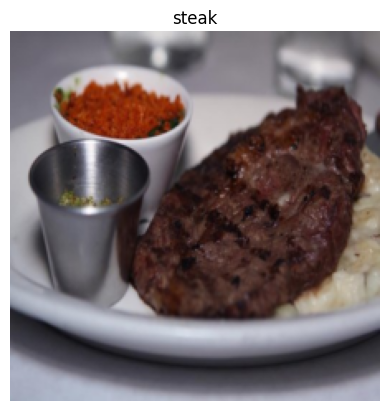

In [23]:
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

In [ ]:
#plot w. matplotlib